In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import fbeta_score


In [2]:
input_file = r'C:\Users\csinc\Documents\Charlie\Side_Projects\Kaggle\Credit_Card_Fraud_Detection\Data\creditcard.csv'

df = pd.read_csv(input_file)

# Data

The data contains 31 columns.
Time since initial transaction.
Amount of transaction.
28 PCA variables.
Class - 1 for fraud, 0 for not.

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df['Index'] = np.linspace(0, df.shape[0]-1, df.shape[0], dtype = 'int64')

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Index'],
      dtype='object')

In [6]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
# removed index as it doesn't mean anything for modelling
# removed time for the same reason as index
X = df[features]
y = df['Class']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [17]:
def recall_score(y_test, y_pred):
    cnf_matrix = confusion_matrix(y_test,y_pred)
    return(cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

def model_metric(X_train, y_train, X_test, y_test, over_perc, under_perc):
    
    oversample = SMOTE(sampling_strategy = over_perc)
    undersample = RandomUnderSampler(sampling_strategy = under_perc)
    model = XGBClassifier(eval_metric = 'aucpr', use_label_encoder=False)
    steps = [('over', oversample), ('under', undersample), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    metric = fbeta_score(y_test, y_pred, average='macro', beta = 2)
    return(metric)

def model_base(X_train, y_train, X_test, y_test):
    
    model = XGBClassifier(use_label_encoder=False)
    steps = [('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    return(pipeline)

In [95]:
# TO FIND OPTIMAL OVER AND UNDER SAMPLING LEVELS
# Optimal here means maximising recall score.

over_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
under_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

max_metric = 0
optimum_setting = ['null','null']
i = 1

for over_perc in over_lst:
    for under_perc in under_lst:
        if over_perc <= under_perc: #Errors if this isn't true.
            metric = create_model(X_train, y_train, X_test, y_test, over_perc, under_perc)
            if metric > max_metric:
                optimum_setting = [over_perc, under_perc]
                max_metric = metric
        print(str(round(i*100 / (len(over_lst)*len(under_lst)), 2)) + '% Complete             ', end = '\r')
        i += 1

print('The optimal setting is:', optimum_setting)
print('Max F2 Score: ', max_metric)

The optimal setting is: [0.1, 0.3]
Max F2 Score:  0.8979591836734694


In [9]:
def create_model_XGB(X_train, y_train, X_test, y_test, over_perc, under_perc):
    
    oversample = SMOTE(sampling_strategy = over_perc)
    undersample = RandomUnderSampler(sampling_strategy = under_perc)
    model = XGBClassifier(eval_metric = 'aucpr', use_label_encoder=False)
    steps = [('over', oversample), ('under', undersample), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train, y_train)
    return(pipeline)

def create_model_RFC(X_train, y_train, X_test, y_test, over_perc, under_perc):
    
    oversample = SMOTE(sampling_strategy = over_perc)
    undersample = RandomUnderSampler(sampling_strategy = under_perc)
    model = RandomForestClassifier()
    steps = [('over', oversample), ('under', undersample), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train, y_train)
    return(pipeline)

def create_model_LogReg(X_train, y_train, X_test, y_test, over_perc, under_perc):
    
    scaler = StandardScaler()
    oversample = SMOTE(sampling_strategy = over_perc)
    undersample = RandomUnderSampler(sampling_strategy = under_perc)
    model = LogisticRegression()
    steps = [('scaler', scaler), ('over', oversample), ('under', undersample), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train, y_train)
    return(pipeline)

def create_model_SVC(X_train, y_train, X_test, y_test, over_perc, under_perc):
    
    scaler = StandardScaler()
    oversample = SMOTE(sampling_strategy = over_perc)
    undersample = RandomUnderSampler(sampling_strategy = under_perc)
    model = svm.SVC()
    steps = [('over', oversample), ('under', undersample), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train, y_train)
    return(pipeline)

In [18]:
over = 0.3
under = 0.5

#pipeline_XGB = create_model_XGB(X_train, y_train, X_test, y_test, over, under)
#pipeline_RFC = create_model_RFC(X_train, y_train, X_test, y_test, over, under)
#pipeline_LogReg = create_model_LogReg(X_train, y_train, X_test, y_test, over, under)
#pipeline_SVC = create_model_SVC(X_train, y_train, X_test, y_test, over, under)
pipeline_base = model_base(X_train, y_train, X_test, y_test)

[20:26:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [11]:
y_pred_XGB = pipeline_XGB.predict(X_test)
y_pred_RFC = pipeline_RFC.predict(X_test)
y_pred_LogReg = pipeline_LogReg.predict(X_test)
y_pred_SVC = pipeline_SVC.predict(X_test)
y_pred_Base = pipeline_base.predict(X_test)

In [20]:
print("ROC Score for XGBClassifier: ", roc_auc_score(y_test, y_pred_XGB))
print("ROC Score for RandomForestClassifier: ", roc_auc_score(y_test, y_pred_RFC))
print("ROC Score for Logistic Regression: ", roc_auc_score(y_test, y_pred_LogReg))
print("ROC Score for Support Vector Machine: ", roc_auc_score(y_test, y_pred_SVC))
print("ROC Score for Base Model: ", roc_auc_score(y_test, y_pred_Base))

ROC Score for XGBClassifier:  0.9435610062820851
ROC Score for RandomForestClassifier:  0.9283428129270842
ROC Score for Logistic Regression:  0.9427014545266617
ROC Score for Support Vector Machine:  0.9358386784651959
ROC Score for Base Model:  0.9081017149403374


Confusion Matrix for XGBClassifier

Confusion Matrix for RandomForestClassifier

Confusion Matrix for Logistic Regression

Confusion Matrix for Support Vector Machine


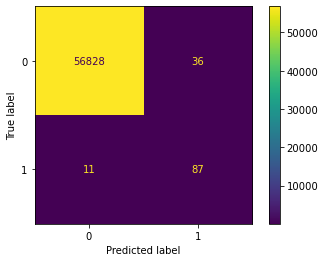

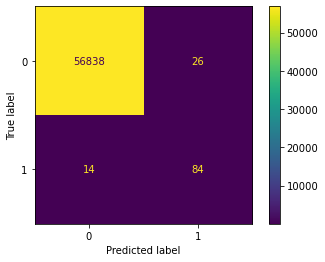

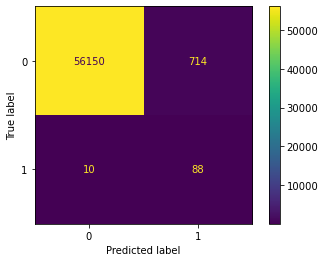

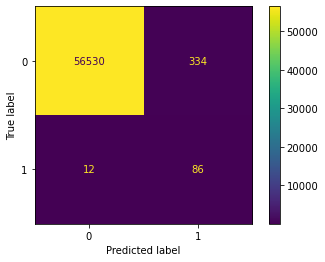

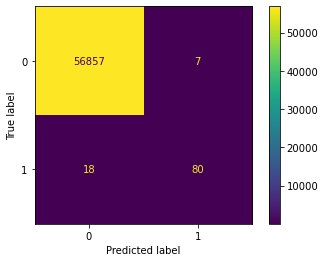

In [19]:
print('Confusion Matrix for XGBClassifier')
plot_confusion_matrix(pipeline_XGB, X_test, y_test)
print('\nConfusion Matrix for RandomForestClassifier')
plot_confusion_matrix(pipeline_RFC, X_test, y_test)
print('\nConfusion Matrix for Logistic Regression')
plot_confusion_matrix(pipeline_LogReg, X_test, y_test)
print('\nConfusion Matrix for Support Vector Machine')
plot_confusion_matrix(pipeline_SVC, X_test, y_test)
plot_confusion_matrix(pipeline_base, X_test, y_test)  

In [21]:
print("Recall Score for XGBClassifier: ", recall_score(y_test, y_pred_XGB))
print("Recall Score for RandomForestClassifier: ", recall_score(y_test, y_pred_RFC))
print("Recall Score for Logistic Regression: ", recall_score(y_test, y_pred_LogReg))
print("Recall Score for Support Vector Machine: ", recall_score(y_test, y_pred_SVC))
print("Recall Score for Base Model: ", recall_score(y_test, y_pred_Base))

Recall Score for XGBClassifier:  0.8877551020408163
Recall Score for RandomForestClassifier:  0.8571428571428571
Recall Score for Logistic Regression:  0.8979591836734694
Recall Score for Support Vector Machine:  0.8775510204081632
Recall Score for Base Model:  0.8163265306122449


In [22]:
print("F1 Score for XGBClassifier: ", f1_score(y_test, y_pred_XGB, average='macro'))
print("F1 Score for RandomForestClassifier: ", f1_score(y_test, y_pred_RFC, average='macro'))
print("F1 Score for Logistic Regression: ", f1_score(y_test, y_pred_LogReg, average='macro'))
print("F1 Score for Support Vector Machine: ", f1_score(y_test, y_pred_SVC, average='macro'))
print("F1 Score for Base Model: ", f1_score(y_test, y_pred_Base, average='macro'))

F1 Score for XGBClassifier:  0.8934584795674911
F1 Score for RandomForestClassifier:  0.9036702771005771
F1 Score for Logistic Regression:  0.5945749182081289
F1 Score for Support Vector Machine:  0.6644976735448139
F1 Score for Base Model:  0.9323225316947786


In [126]:
y_pred_XGB = pipeline_XGB.predict_proba(X_test)[:,1]
y_pred_RFC = pipeline_RFC.predict_proba(X_test)[:,1]
#y_pred_LogReg = pipeline_LogReg.predict_proba(X_test)[:,1] #f1 score too low
#y_pred_SVC = pipeline_SVC.predict_proba(X_test) #would need to rerun

#y_pred_ens = (y_pred_XGB + y_pred_RFC + y_pred_LogReg)/3
y_pred_ens = (y_pred_XGB + y_pred_RFC)/2

In [127]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ens)
# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold = %f' % (best_thresh))

Best Threshold = 0.015169


In [128]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_ens)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
f2_measure = ((5)* precision * recall) / (4*precision + recall)
f0_5_measure = ((1.25)* precision * recall) / (0.25*precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
iy = np.argmax(f2_measure)
iz = np.argmax(f0_5_measure)
print('Best Threshold = %f, F-Score = %.3f' % (thresholds[ix], fscore[ix]))
print('Best Threshold = %f, F2-Score = %.3f' % (thresholds[iy], f2_measure[iy]))
print('Best Threshold = %f, F0.5-Score = %.3f' % (thresholds[iz], f0_5_measure[iz]))

Best Threshold = 0.887010, F-Score = 0.879
Best Threshold = 0.623288, F2-Score = 0.875
Best Threshold = 0.899821, F0.5-Score = 0.927


In [129]:
y_pred_ens_f1 = y_pred_ens.copy()
y_pred_ens_f1[y_pred_ens_f1 > thresholds[ix]] = 1
y_pred_ens_f1[y_pred_ens_f1 <= thresholds[ix]] = 0

print("F1 Score for Ensembled Model: ", f1_score(y_test, y_pred_ens_f1, average='macro'))
print("Recall Score for Ensembled Model: ", recall_score(y_test, y_pred_ens_f1))
print("ROC Score for Ensembled Model: ", roc_auc_score(y_test, y_pred_ens_f1))
cnf_matrix = confusion_matrix(y_test,y_pred_ens_f1)
print(cnf_matrix)

F1 Score for Ensembled Model:  0.9363629832748375
Recall Score for Ensembled Model:  0.8061224489795918
ROC Score for Ensembled Model:  0.9030260528522045
[[56860     4]
 [   19    79]]


In [134]:
y_pred_ens_f2 = y_pred_ens.copy()
y_pred_ens_f2[y_pred_ens_f2 > thresholds[iy]] = 1
y_pred_ens_f2[y_pred_ens_f2 <= thresholds[iy]] = 0

print("F1 Score for Ensembled Model: ", f1_score(y_test, y_pred_ens_f2, average='macro'))
print("F2 Score for Ensembled Model: ", fbeta_score(y_test, y_pred_ens_f2, average='macro', beta = 2))
print("Recall Score for Ensembled Model: ", recall_score(y_test, y_pred_ens_f2))
print("ROC Score for Ensembled Model: ", roc_auc_score(y_test, y_pred_ens_f2))
cnf_matrix = confusion_matrix(y_test,y_pred_ens_f2)
print('\nConfusion Matrix')
print(cnf_matrix)

F1 Score for Ensembled Model:  0.9256106736577175
F2 Score for Ensembled Model:  0.9333200179401828
Recall Score for Ensembled Model:  0.8775510204081632
ROC Score for Ensembled Model:  0.9386172378349201

Confusion Matrix
[[56846    18]
 [   12    86]]


In [131]:
y_pred_ens_f05 = y_pred_ens.copy()
y_pred_ens_f05[y_pred_ens_f05 > thresholds[iz]] = 1
y_pred_ens_f05[y_pred_ens_f05 <= thresholds[iz]] = 0

print("F1 Score for Ensembled Model: ", f1_score(y_test, y_pred_ens_f05, average='macro'))
print("Recall Score for Ensembled Model: ", recall_score(y_test, y_pred_ens_f05))
print("ROC Score for Ensembled Model: ", roc_auc_score(y_test, y_pred_ens_f05))
cnf_matrix = confusion_matrix(y_test,y_pred_ens_f05)
print(cnf_matrix)

F1 Score for Ensembled Model:  0.9356530865989321
Recall Score for Ensembled Model:  0.7959183673469388
ROC Score for Ensembled Model:  0.8979328049452758
[[56861     3]
 [   20    78]]


In [ ]:

"""
F1 Score for Ensembled Model:  0.9235090217121559
Recall Score for Ensembled Model:  0.8775510204081632
ROC Score for Ensembled Model:  0.9386084449255222
[[56845    19]
 [   12    86]]
 """

In [28]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
import warnings

In [40]:
def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    
    oversample = SMOTE(sampling_strategy = space['over_perc'])
    undersample = RandomUnderSampler(sampling_strategy = space['under_perc'])
    model = XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree'],
                            eval_metric = 'aucpr',
                            use_label_encoder = False
                            )
    steps = [('over', oversample), ('under', undersample), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train, y_train)
    
    # Applying k-Fold Cross Validation

    scores = cross_val_score(estimator = pipeline, X = X_train, y = y_train, cv = 10, scoring=ftwo_scorer)
    CrossValF2 = scores.mean()

    #print("CrossValMean:", CrossValMean)
    return{'loss':1-CrossValF2, 'status': STATUS_OK }

def objective_RFC(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    
    oversample = SMOTE(sampling_strategy = space['over_perc'])
    undersample = RandomUnderSampler(sampling_strategy = space['under_perc'])
    model = XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree'],
                            eval_metric = 'aucpr',
                            use_label_encoder = False
                            )
    steps = [('over', oversample), ('under', undersample), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train, y_train)
    
    # Applying k-Fold Cross Validation

    scores = cross_val_score(estimator = pipeline, X = X_train, y = y_train, cv = 10, scoring=ftwo_scorer)
    CrossValF2 = scores.mean()

    #print("CrossValMean:", CrossValMean)
    return{'loss':1-CrossValF2, 'status': STATUS_OK }

space = {
    'over_perc' : hp.quniform('over_perc', 0.1, 0.50, 0.05),
    'under_perc' : hp.quniform('under_perc', 0.50, 1.00, 0.05),
    'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}

trials = Trials()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print("Best: ", best)

100%|██████████████████████████████████████████| 100/100 [4:28:06<00:00, 160.86s/trial, best loss: 0.15703806095118122]
Best:  {'colsample_bytree': 0.27, 'gamma': 0.27, 'learning_rate': 0.25, 'max_depth': 15, 'min_child_weight': 1.0, 'n_estimators': 35, 'over_perc': 0.45, 'subsample': 0.43, 'under_perc': 0.55}


In [43]:
def create_model_XGB_best(X_train, y_train, best):
    
    oversample = SMOTE(sampling_strategy = best['over_perc'])
    undersample = RandomUnderSampler(sampling_strategy = best['under_perc'])
    model = XGBClassifier(n_estimators = best['n_estimators'],
                            max_depth = int(best['max_depth']),
                            learning_rate = best['learning_rate'],
                            gamma = best['gamma'],
                            min_child_weight = best['min_child_weight'],
                            subsample = best['subsample'],
                            colsample_bytree = best['colsample_bytree'],
                            eval_metric = 'aucpr',
                            use_label_encoder = False)
    steps = [('over', oversample), ('under', undersample), ('model', model)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train, y_train)
    return(pipeline)

F1 Score for Ensembled Model:  0.9074114540376719
F2 Score for Ensembled Model:  0.9255315332978928
Recall Score for Ensembled Model:  0.8775510204081632
ROC Score for Ensembled Model:  0.9385381016503392


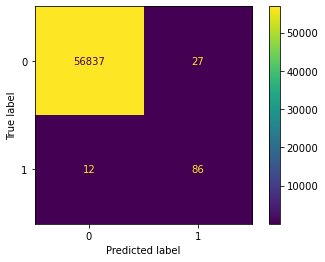

In [44]:
pipeline_best = create_model_XGB_best(X_train, y_train, best)
plot_confusion_matrix(pipeline_best, X_test, y_test)
y_pred_best = pipeline_best.predict(X_test)
print("F1 Score for Ensembled Model: ", f1_score(y_test, y_pred_best, average='macro'))
print("F2 Score for Ensembled Model: ", fbeta_score(y_test, y_pred_best, average='macro', beta = 2))
print("Recall Score for Ensembled Model: ", recall_score(y_test, y_pred_best))
print("ROC Score for Ensembled Model: ", roc_auc_score(y_test, y_pred_best))